In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
low_rank = pd.read_csv('low_rank_final.csv')
high_rank = pd.read_csv('high_rank_final.csv')

In [3]:
low_rank=low_rank.drop(['Unnamed: 0'], axis=1)
high_rank=high_rank.drop(['Unnamed: 0'], axis=1)

In [4]:
high_rank

,game_duration,game_ended_in_surrender,game_ended_in_early_surrender,blue_side_won,total_blue_side_minions_killed,total_blue_side_kills,total_blue_side_deaths,total_blue_side_assists,total_blue_side_gold_earned,total_blue_side_gold_spent,...,total_red_side_gold_spent,total_red_side_ward_takedowns,total_red_side_wards_placed,total_red_side_vision_score,total_towers_destroyed_by_red,total_inhibitors_destroyed_by_red,total_red_side_dragons_killed,total_red_side_horde,total_red_side_baron,total_red_side_riftHerald
0,1331,False,False,False,537,9,41,15,37713,34375,...,42450,9,37,82,11,3,2,0,0,1
1,1552,True,False,False,759,14,21,20,44515,43220,...,45900,26,43,146,8,2,2,0,1,0
2,917,True,False,True,506,24,8,22,36436,30735,...,21400,4,33,59,0,0,0,0,0,0
3,915,True,False,True,561,24,8,22,34724,29625,...,24112,5,36,62,0,0,0,0,0,0
4,2132,False,False,False,1051,28,36,31,65737,67345,...,68875,52,64,230,10,1,4,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6922,1960,False,False,False,978,29,35,52,60888,57300,...,65670,27,80,222,10,2,4,0,1,1
6923,1997,False,False,False,937,32,28,47,66587,65625,...,60985,25,79,185,7,1,4,0,1,0
6924,2195,False,False,False,1017,47,45,69,78831,71360,...,74960,39,87,225,9,2,2,2,2,0
6925,1336,True,False,True,748,31,15,58,49786,47300,...,36325,19,45,112,2,0,0,3,0,0


In [5]:
low_rank

,game_duration,game_ended_in_surrender,game_ended_in_early_surrender,blue_side_won,total_blue_side_minions_killed,total_blue_side_kills,total_blue_side_deaths,total_blue_side_assists,total_blue_side_gold_earned,total_blue_side_gold_spent,...,total_red_side_gold_spent,total_red_side_ward_takedowns,total_red_side_wards_placed,total_red_side_vision_score,total_towers_destroyed_by_red,total_inhibitors_destroyed_by_red,total_red_side_dragons_killed,total_red_side_horde,total_red_side_baron,total_red_side_riftHerald
0,1799,False,False,True,820,32,42,51,61419,56225,...,60508,17,43,131,6,1,3,0,1,0
1,2009,False,False,True,874,41,52,60,72434,66950,...,65833,13,45,134,8,1,2,0,2,1
2,2840,False,False,False,1192,68,56,103,101020,105835,...,91900,19,91,212,11,8,5,5,2,0
3,2204,False,False,False,975,22,44,27,66360,64476,...,66930,13,73,169,9,3,4,3,2,0
4,1917,False,False,True,906,38,32,46,70195,61325,...,61270,18,56,159,6,0,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6922,2468,False,False,True,1142,44,51,56,82612,75316,...,77750,13,82,208,9,2,3,0,2,0
6923,2049,False,False,False,905,38,42,43,65035,58775,...,68200,23,60,177,11,3,3,6,1,1
6924,1510,False,False,False,687,25,38,30,49141,44725,...,54075,11,45,113,9,3,3,3,0,1
6925,2657,False,False,True,1193,51,49,64,94224,83200,...,88308,32,82,257,7,1,4,3,0,1


In [6]:
#create new features
dfs = [low_rank, high_rank]

for df in dfs:
    #game duration conversion
    df['game_duration_mins']= df['game_duration']/60

    #gold per minute (gpm)
    df['blue_side_gpm']=df['total_blue_side_gold_earned']/df['game_duration_mins']
    df['red_side_gpm']=df['total_red_side_gold_earned']/df['game_duration_mins']

    #gold spent ratio (gsr)
    df['blue_side_gsr']=df['total_blue_side_gold_spent']/df['total_blue_side_gold_earned']
    df['red_side_gsr']=df['total_red_side_gold_spent']/df['total_red_side_gold_earned']

    #objective control ratio
    df['blue_side_objective_ratio']=(df['total_blue_side_baron']+df['total_blue_side_dragons_killed']+df['total_blue_side_horde']+df['total_blue_side_riftHerald']+df['total_towers_destroyed_by_blue']+df['total_inhibitors_destroyed_by_blue'])/df['game_duration_mins']
    df['red_side_objective_ratio']=(df['total_red_side_baron']+df['total_red_side_dragons_killed']+df['total_red_side_horde']+df['total_red_side_riftHerald']+df['total_towers_destroyed_by_red']+df['total_inhibitors_destroyed_by_red'])/df['game_duration_mins']
    
    #wards placed per minute (wpm)
    df['blue_side_wpm']=df['total_red_side_wards_placed']/df['game_duration_mins']
    df['red_side_wpm']=df['total_red_side_wards_placed']/df['game_duration_mins']

    #wards killed per minute (wkm)
    df['blue_side_wkm']=df['total_blue_side_wards_killed']/df['game_duration_mins']
    df['red_side_wkm']=df['total_red_side_ward_takedowns']/df['game_duration_mins']


In [8]:
high_rank.columns

Index(['game_ended_in_surrender', 'game_ended_in_early_surrender',
       'blue_side_won', 'total_blue_side_minions_killed',
       'total_blue_side_kills', 'total_blue_side_deaths',
       'total_blue_side_assists', 'total_blue_side_gold_earned',
       'total_blue_side_gold_spent', 'total_blue_side_wards_killed',
       'total_blue_side_wards_placed', 'total_blue_side_vision_score',
       'total_towers_destroyed_by_blue', 'total_inhibitors_destroyed_by_blue',
       'total_blue_side_dragons_killed', 'total_blue_side_horde',
       'total_blue_side_baron', 'total_blue_side_riftHerald',
       'total_red_side_minions_killed', 'total_red_side_kills',
       'total_red_side_deaths', 'total_red_side_assists',
       'total_red_side_gold_earned', 'total_red_side_gold_spent',
       'total_red_side_ward_takedowns', 'total_red_side_wards_placed',
       'total_red_side_vision_score', 'total_towers_destroyed_by_red',
       'total_inhibitors_destroyed_by_red', 'total_red_side_dragons_killed'

In [7]:
high_rank=high_rank.drop('game_duration', axis=1)
low_rank=low_rank.drop('game_duration', axis=1)

In [8]:
low_rank.columns

Index(['game_ended_in_surrender', 'game_ended_in_early_surrender',
       'blue_side_won', 'total_blue_side_minions_killed',
       'total_blue_side_kills', 'total_blue_side_deaths',
       'total_blue_side_assists', 'total_blue_side_gold_earned',
       'total_blue_side_gold_spent', 'total_blue_side_wards_killed',
       'total_blue_side_wards_placed', 'total_blue_side_vision_score',
       'total_towers_destroyed_by_blue', 'total_inhibitors_destroyed_by_blue',
       'total_blue_side_dragons_killed', 'total_blue_side_horde',
       'total_blue_side_baron', 'total_blue_side_riftHerald',
       'total_red_side_minions_killed', 'total_red_side_kills',
       'total_red_side_deaths', 'total_red_side_assists',
       'total_red_side_gold_earned', 'total_red_side_gold_spent',
       'total_red_side_ward_takedowns', 'total_red_side_wards_placed',
       'total_red_side_vision_score', 'total_towers_destroyed_by_red',
       'total_inhibitors_destroyed_by_red', 'total_red_side_dragons_killed'

In [9]:
high_rank.describe()

,total_blue_side_minions_killed,total_blue_side_kills,total_blue_side_deaths,total_blue_side_assists,total_blue_side_gold_earned,total_blue_side_gold_spent,total_blue_side_wards_killed,total_blue_side_wards_placed,total_blue_side_vision_score,total_towers_destroyed_by_blue,...,blue_side_gpm,red_side_gpm,blue_side_gsr,red_side_gsr,blue_side_objective_ratio,red_side_objective_ratio,blue_side_wpm,red_side_wpm,blue_side_wkm,red_side_wkm
count,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,...,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000
mean,758.532987,25.156345,26.020211,39.208171,52063.235455,47936.459795,19.588855,60.554208,142.570954,5.194601,...,2016.672956,2046.105638,0.918491,0.914706,0.430563,0.426076,2.335822,2.335822,0.725427,0.737443
std,188.856500,11.109512,10.982274,20.839692,14593.509406,13883.732082,10.712766,21.487398,54.006298,3.526306,...,249.688147,246.506359,0.051420,0.049760,0.246108,0.242930,0.476087,0.476087,0.302506,0.299579
min,0.000000,0.000000,0.000000,0.000000,2500.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,1249.239130,1236.315789,0.392314,0.498960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,648.000000,17.000000,18.000000,23.000000,42606.500000,39237.000000,12.000000,46.000000,106.000000,2.000000,...,1830.498108,1862.382933,0.887374,0.884362,0.235583,0.229446,2.035816,2.035816,0.518628,0.530612
50%,764.000000,25.000000,26.000000,38.000000,53284.000000,48695.000000,18.000000,60.000000,141.000000,5.000000,...,2022.703448,2070.896785,0.925544,0.918941,0.406154,0.420485,2.302041,2.302041,0.701970,0.718816
75%,878.000000,33.000000,34.000000,53.000000,61853.500000,56941.500000,26.000000,74.000000,177.000000,9.000000,...,2211.091178,2232.084547,0.953594,0.949751,0.614934,0.607491,2.606163,2.606163,0.911018,0.924826
max,1468.000000,68.000000,66.000000,132.000000,98072.000000,97735.000000,79.000000,188.000000,367.000000,11.000000,...,2756.022945,2848.500000,1.339327,1.290048,1.386139,1.270161,6.335740,6.335740,2.241153,2.103787


In [10]:
low_rank.describe()

,total_blue_side_minions_killed,total_blue_side_kills,total_blue_side_deaths,total_blue_side_assists,total_blue_side_gold_earned,total_blue_side_gold_spent,total_blue_side_wards_killed,total_blue_side_wards_placed,total_blue_side_vision_score,total_towers_destroyed_by_blue,...,blue_side_gpm,red_side_gpm,blue_side_gsr,red_side_gsr,blue_side_objective_ratio,red_side_objective_ratio,blue_side_wpm,red_side_wpm,blue_side_wkm,red_side_wkm
count,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,...,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000
mean,778.372600,29.475386,29.686877,38.982821,56351.580049,51735.141764,14.217554,55.377508,132.048073,5.913238,...,1977.334798,1977.202643,0.913784,0.913300,0.433030,0.421610,1.912338,1.912338,0.480856,0.485807
std,216.629472,12.877348,13.043596,20.057458,16881.930229,16030.446873,7.850531,19.873262,50.516959,3.708885,...,240.558026,241.692577,0.056359,0.055774,0.251896,0.252087,0.402771,0.402771,0.220798,0.223452
min,0.000000,0.000000,0.000000,0.000000,2500.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,1183.934426,1101.610169,0.406570,0.412805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,668.000000,21.000000,21.000000,25.000000,47067.500000,43175.000000,9.000000,43.000000,101.000000,3.000000,...,1808.036173,1806.689489,0.885425,0.885684,0.229992,0.214231,1.688685,1.688685,0.328251,0.337975
50%,789.000000,30.000000,30.000000,38.000000,57471.000000,52658.000000,13.000000,55.000000,132.000000,6.000000,...,1996.135675,1998.544450,0.921222,0.919636,0.415065,0.407659,1.918721,1.918721,0.466926,0.473373
75%,908.500000,38.000000,39.000000,52.000000,67179.000000,61783.000000,19.000000,67.000000,163.000000,9.000000,...,2158.409280,2161.420145,0.950612,0.948791,0.624211,0.613811,2.156973,2.156973,0.618130,0.616386
max,1790.000000,81.000000,84.000000,141.000000,127770.000000,141149.000000,60.000000,138.000000,339.000000,11.000000,...,3118.389831,2810.619638,1.357688,1.166677,1.271186,1.393643,3.628396,3.628396,1.520821,1.632000


In [11]:
high_rank.columns

Index(['game_ended_in_surrender', 'game_ended_in_early_surrender',
       'blue_side_won', 'total_blue_side_minions_killed',
       'total_blue_side_kills', 'total_blue_side_deaths',
       'total_blue_side_assists', 'total_blue_side_gold_earned',
       'total_blue_side_gold_spent', 'total_blue_side_wards_killed',
       'total_blue_side_wards_placed', 'total_blue_side_vision_score',
       'total_towers_destroyed_by_blue', 'total_inhibitors_destroyed_by_blue',
       'total_blue_side_dragons_killed', 'total_blue_side_horde',
       'total_blue_side_baron', 'total_blue_side_riftHerald',
       'total_red_side_minions_killed', 'total_red_side_kills',
       'total_red_side_deaths', 'total_red_side_assists',
       'total_red_side_gold_earned', 'total_red_side_gold_spent',
       'total_red_side_ward_takedowns', 'total_red_side_wards_placed',
       'total_red_side_vision_score', 'total_towers_destroyed_by_red',
       'total_inhibitors_destroyed_by_red', 'total_red_side_dragons_killed'

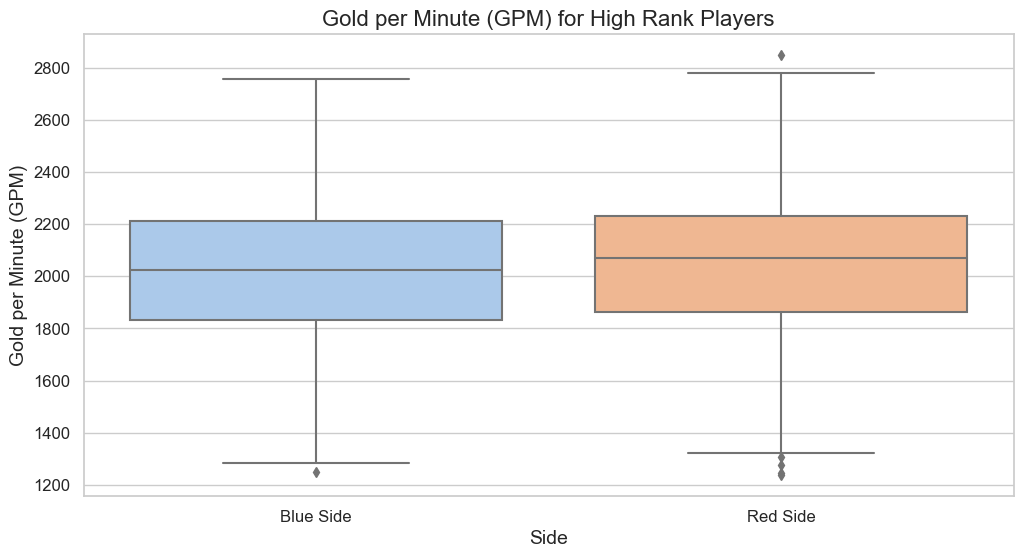

In [12]:
sns.set_theme(style="whitegrid")

# Plot Gold per Minute (GPM) for high rank players
plt.figure(figsize=(12, 6))
sns.boxplot(data=high_rank[['blue_side_gpm', 'red_side_gpm']], palette="pastel")
plt.title('Gold per Minute (GPM) for High Rank Players', fontsize=16)
plt.xlabel('Side', fontsize=14)
plt.ylabel('Gold per Minute (GPM)', fontsize=14)
plt.xticks([0, 1], ['Blue Side', 'Red Side'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

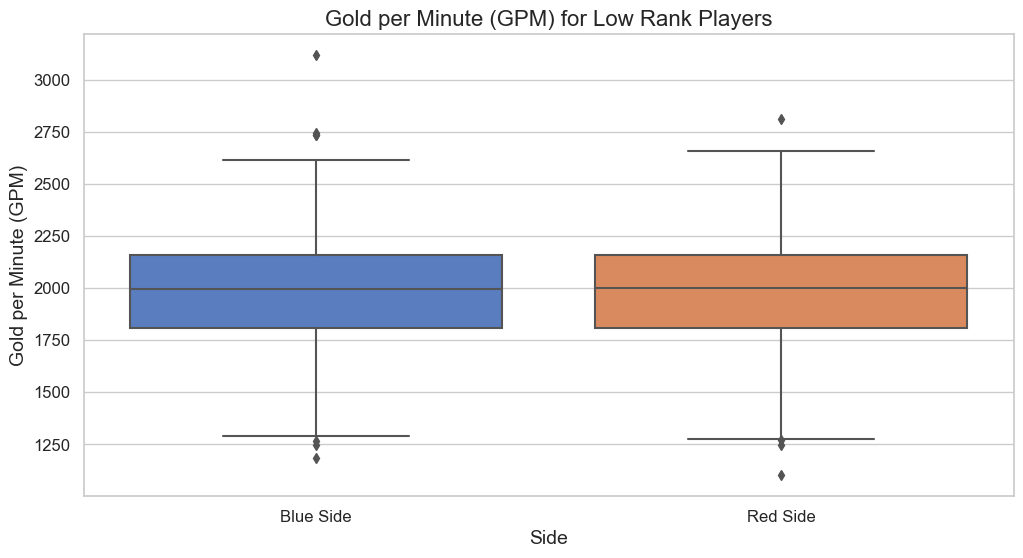

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=low_rank[['blue_side_gpm', 'red_side_gpm']], palette="muted")
plt.title('Gold per Minute (GPM) for Low Rank Players', fontsize=16)
plt.xlabel('Side', fontsize=14)
plt.ylabel('Gold per Minute (GPM)', fontsize=14)
plt.xticks([0, 1], ['Blue Side', 'Red Side'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

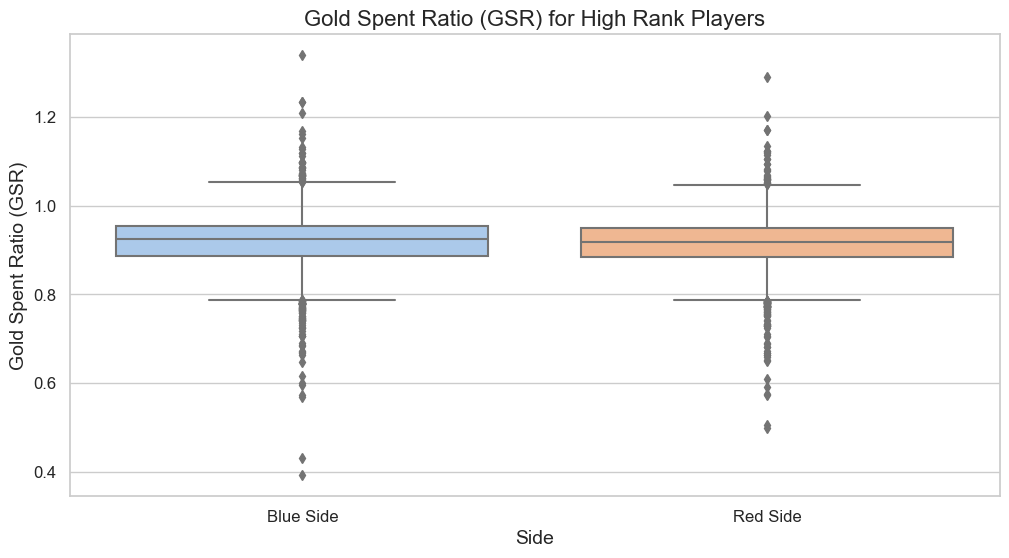

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=high_rank[['blue_side_gsr', 'red_side_gsr']], palette="pastel")
plt.title('Gold Spent Ratio (GSR) for High Rank Players', fontsize=16)
plt.xlabel('Side', fontsize=14)
plt.ylabel('Gold Spent Ratio (GSR)', fontsize=14)
plt.xticks([0, 1], ['Blue Side', 'Red Side'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

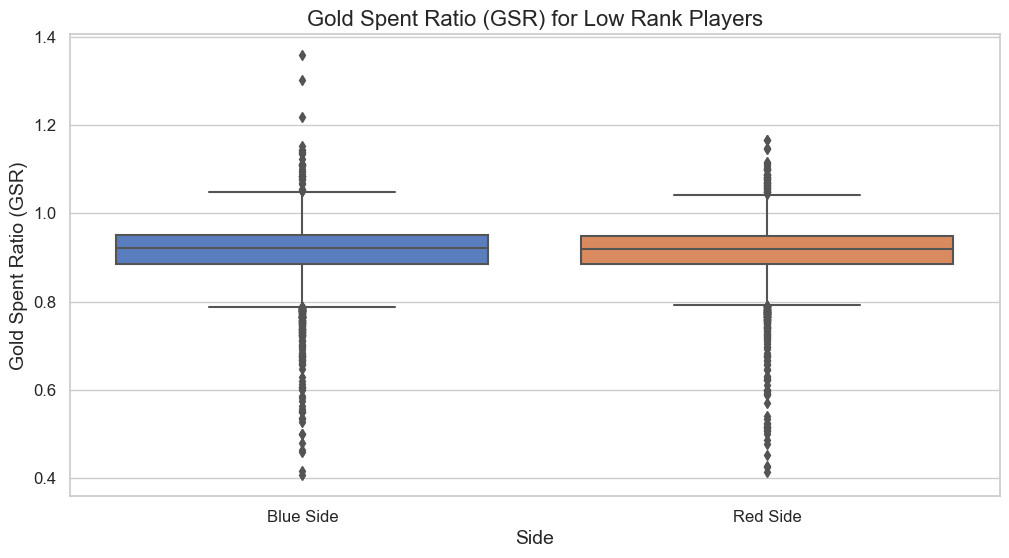

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=low_rank[['blue_side_gsr', 'red_side_gsr']], palette="muted")
plt.title('Gold Spent Ratio (GSR) for Low Rank Players', fontsize=16)
plt.xlabel('Side', fontsize=14)
plt.ylabel('Gold Spent Ratio (GSR)', fontsize=14)
plt.xticks([0, 1], ['Blue Side', 'Red Side'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

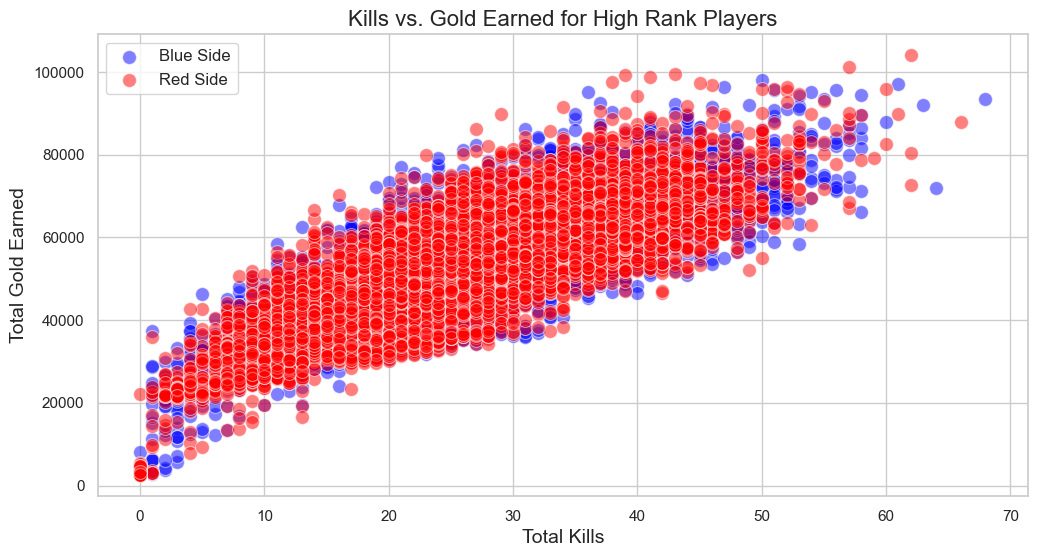

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_blue_side_kills', y='total_blue_side_gold_earned', data=high_rank, color='blue', label='Blue Side', s=100, alpha=0.5)
sns.scatterplot(x='total_red_side_kills', y='total_red_side_gold_earned', data=high_rank, color='red', label='Red Side', s=100, alpha=0.5)
plt.title('Kills vs. Gold Earned for High Rank Players', fontsize=16)
plt.xlabel('Total Kills', fontsize=14)
plt.ylabel('Total Gold Earned', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

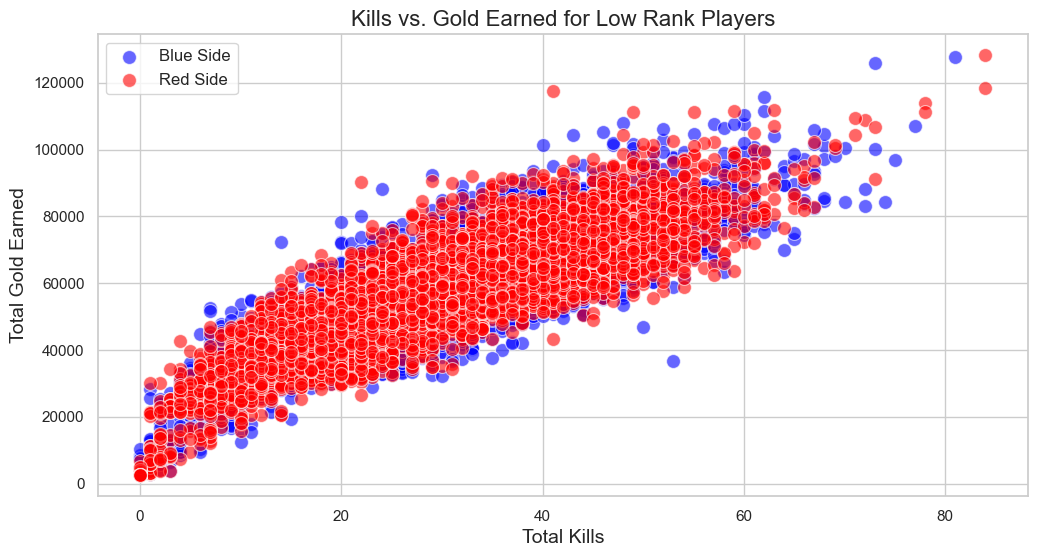

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_blue_side_kills', y='total_blue_side_gold_earned', data=low_rank, color='blue', label='Blue Side', s=100, alpha=0.6)
sns.scatterplot(x='total_red_side_kills', y='total_red_side_gold_earned', data=low_rank, color='red', label='Red Side', s=100, alpha=0.6)
plt.title('Kills vs. Gold Earned for Low Rank Players', fontsize=16)
plt.xlabel('Total Kills', fontsize=14)
plt.ylabel('Total Gold Earned', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

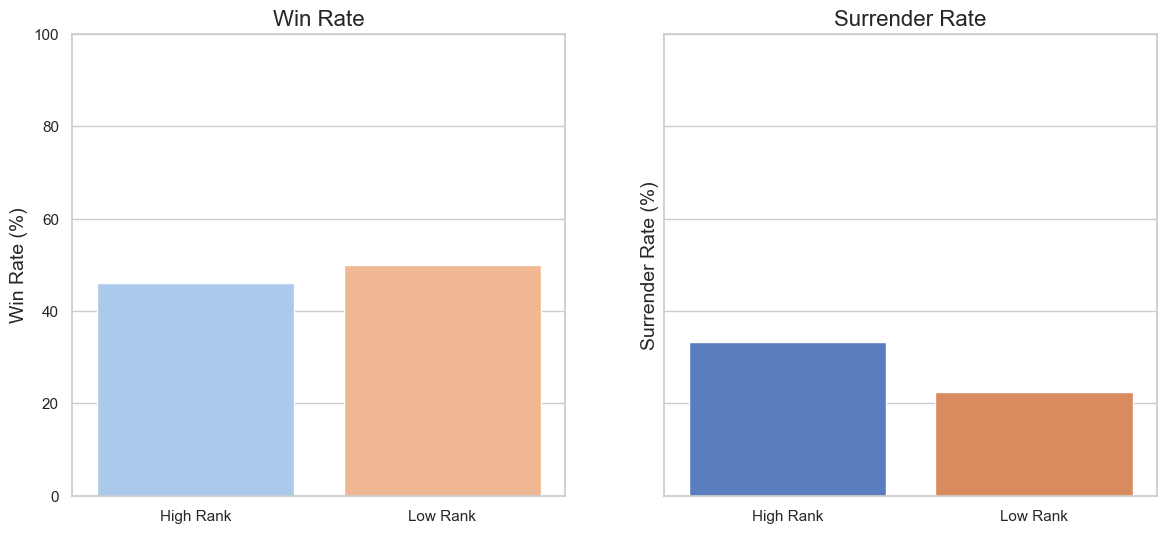

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Win rate plot
sns.barplot(x=['High Rank', 'Low Rank'], y=[high_rank['blue_side_won'].mean() * 100, low_rank['blue_side_won'].mean() * 100], ax=axes[0], palette="pastel")
axes[0].set_title('Win Rate', fontsize=16)
axes[0].set_ylabel('Win Rate (%)', fontsize=14)
axes[0].set_ylim(0, 100)

# Surrender rate plot
sns.barplot(x=['High Rank', 'Low Rank'], y=[high_rank['game_ended_in_surrender'].mean() * 100, low_rank['game_ended_in_surrender'].mean() * 100], ax=axes[1], palette="muted")
axes[1].set_title('Surrender Rate', fontsize=16)
axes[1].set_ylabel('Surrender Rate (%)', fontsize=14)
axes[1].set_ylim(0, 100)

plt.show()

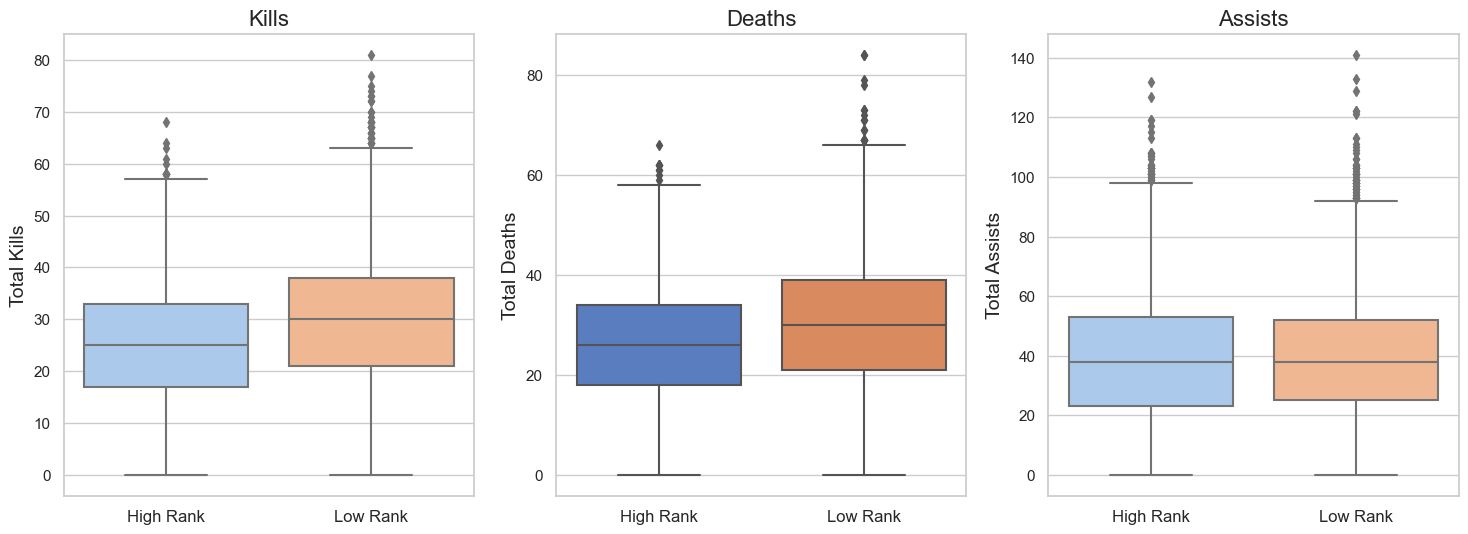

In [19]:
# Kills, deaths, and assists for high and low rank datasets
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Kills
sns.boxplot(data=[high_rank['total_blue_side_kills'], low_rank['total_blue_side_kills']], ax=axes[0], palette="pastel")
axes[0].set_title('Kills', fontsize=16)
axes[0].set_xticklabels(['High Rank', 'Low Rank'], fontsize=12)
axes[0].set_ylabel('Total Kills', fontsize=14)

# Deaths
sns.boxplot(data=[high_rank['total_blue_side_deaths'], low_rank['total_blue_side_deaths']], ax=axes[1], palette="muted")
axes[1].set_title('Deaths', fontsize=16)
axes[1].set_xticklabels(['High Rank', 'Low Rank'], fontsize=12)
axes[1].set_ylabel('Total Deaths', fontsize=14)

# Assists
sns.boxplot(data=[high_rank['total_blue_side_assists'], low_rank['total_blue_side_assists']], ax=axes[2], palette="pastel")
axes[2].set_title('Assists', fontsize=16)
axes[2].set_xticklabels(['High Rank', 'Low Rank'], fontsize=12)
axes[2].set_ylabel('Total Assists', fontsize=14)

plt.show()

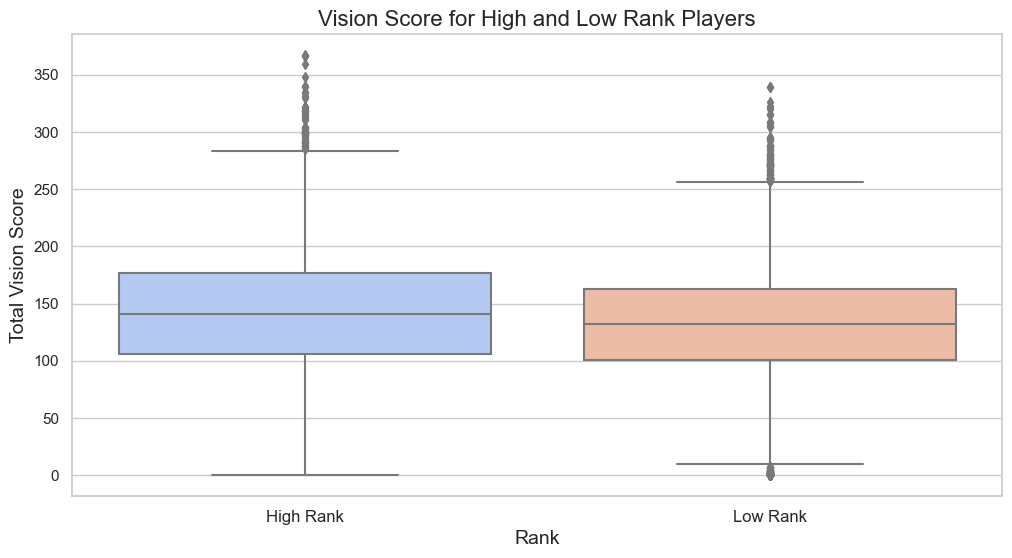

In [20]:
# Vision score comparison for high and low rank datasets
plt.figure(figsize=(12, 6))
sns.boxplot(data=[high_rank['total_blue_side_vision_score'], low_rank['total_blue_side_vision_score']], palette="coolwarm")
plt.title('Vision Score for High and Low Rank Players', fontsize=16)
plt.xticks([0, 1], ['High Rank', 'Low Rank'], fontsize=12)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Total Vision Score', fontsize=14)
plt.show()

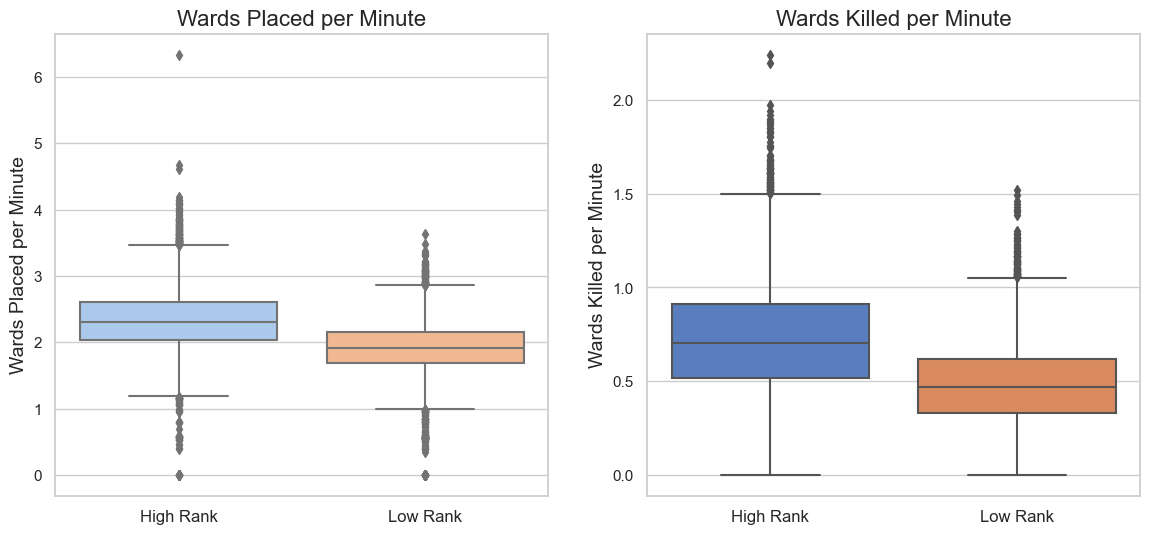

In [21]:
# Wards placed and killed per minute for high and low rank datasets
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Wards placed per minute
sns.boxplot(data=[high_rank['blue_side_wpm'], low_rank['blue_side_wpm']], ax=axes[0], palette="pastel")
axes[0].set_title('Wards Placed per Minute', fontsize=16)
axes[0].set_xticklabels(['High Rank', 'Low Rank'], fontsize=12)
axes[0].set_ylabel('Wards Placed per Minute', fontsize=14)

# Wards killed per minute
sns.boxplot(data=[high_rank['blue_side_wkm'], low_rank['blue_side_wkm']], ax=axes[1], palette="muted")
axes[1].set_title('Wards Killed per Minute', fontsize=16)
axes[1].set_xticklabels(['High Rank', 'Low Rank'], fontsize=12)
axes[1].set_ylabel('Wards Killed per Minute', fontsize=14)

plt.show()


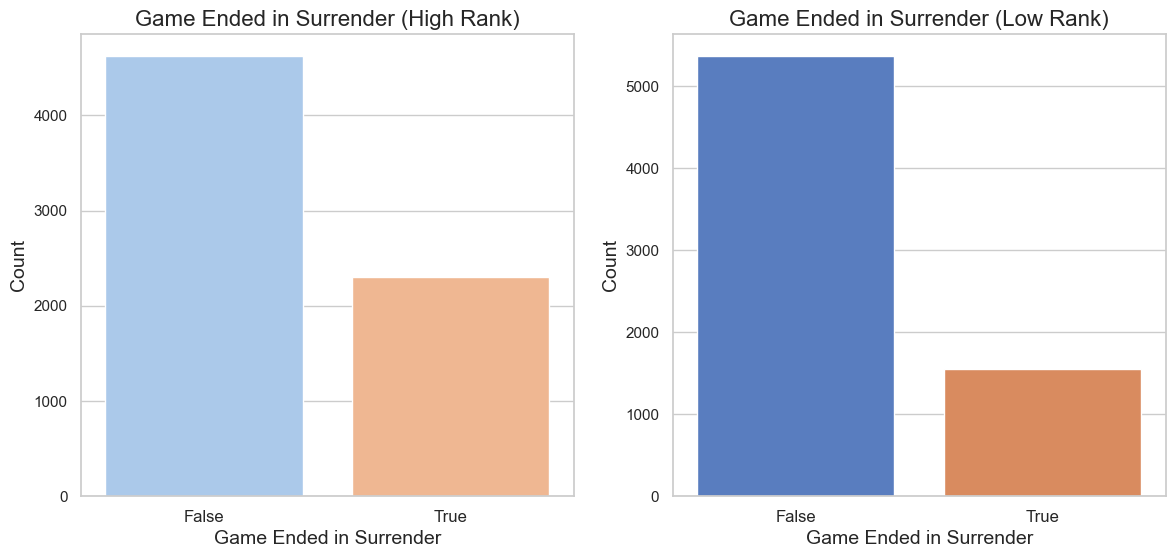

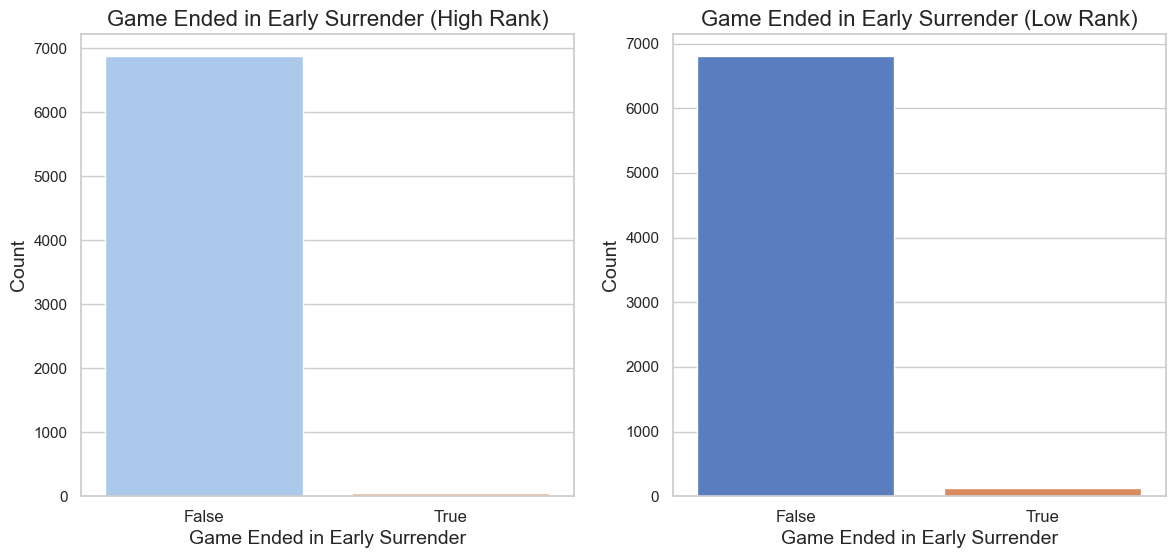

In [22]:
# Count plot for game ended in surrender and early surrender for high and low rank datasets
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Game ended in surrender
sns.countplot(x='game_ended_in_surrender', data=high_rank, ax=axes[0], palette="pastel")
axes[0].set_title('Game Ended in Surrender (High Rank)', fontsize=16)
axes[0].set_xlabel('Game Ended in Surrender', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].set_xticklabels(['False', 'True'], fontsize=12)

sns.countplot(x='game_ended_in_surrender', data=low_rank, ax=axes[1], palette="muted")
axes[1].set_title('Game Ended in Surrender (Low Rank)', fontsize=16)
axes[1].set_xlabel('Game Ended in Surrender', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].set_xticklabels(['False', 'True'], fontsize=12)

plt.show()

# Game ended in early surrender
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='game_ended_in_early_surrender', data=high_rank, ax=axes[0], palette="pastel")
axes[0].set_title('Game Ended in Early Surrender (High Rank)', fontsize=16)
axes[0].set_xlabel('Game Ended in Early Surrender', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].set_xticklabels(['False', 'True'], fontsize=12)

sns.countplot(x='game_ended_in_early_surrender', data=low_rank, ax=axes[1], palette="muted")
axes[1].set_title('Game Ended in Early Surrender (Low Rank)', fontsize=16)
axes[1].set_xlabel('Game Ended in Early Surrender', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].set_xticklabels(['False', 'True'], fontsize=12)

plt.show()


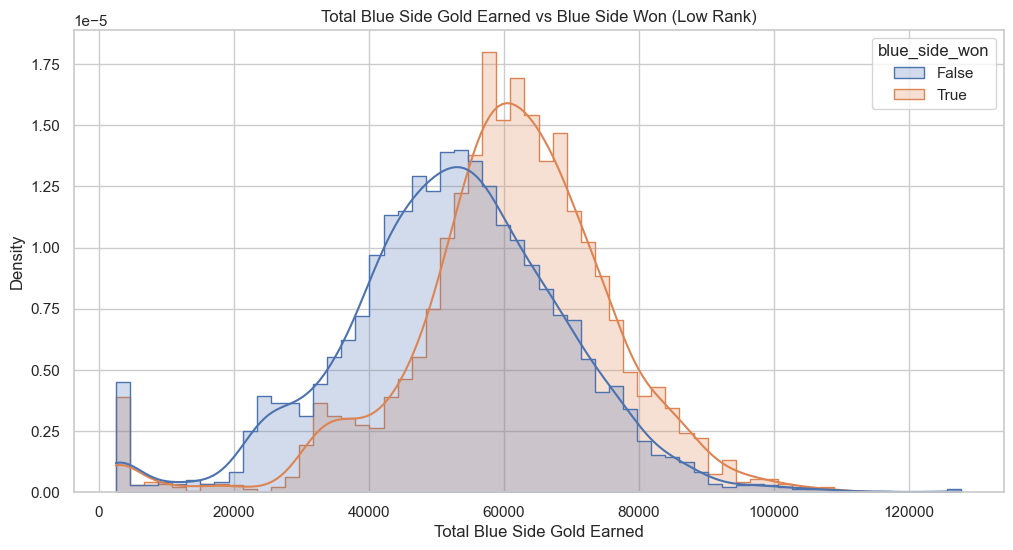

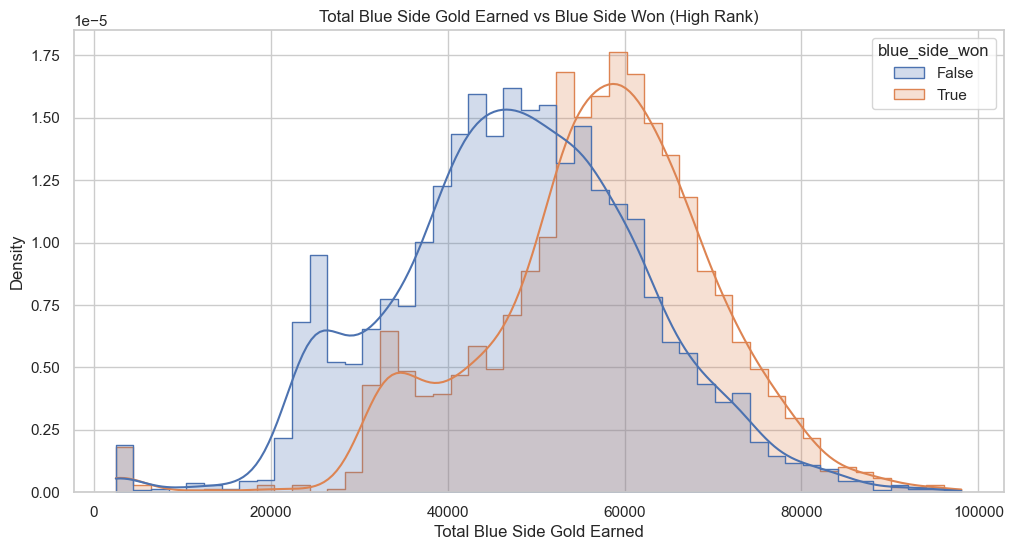

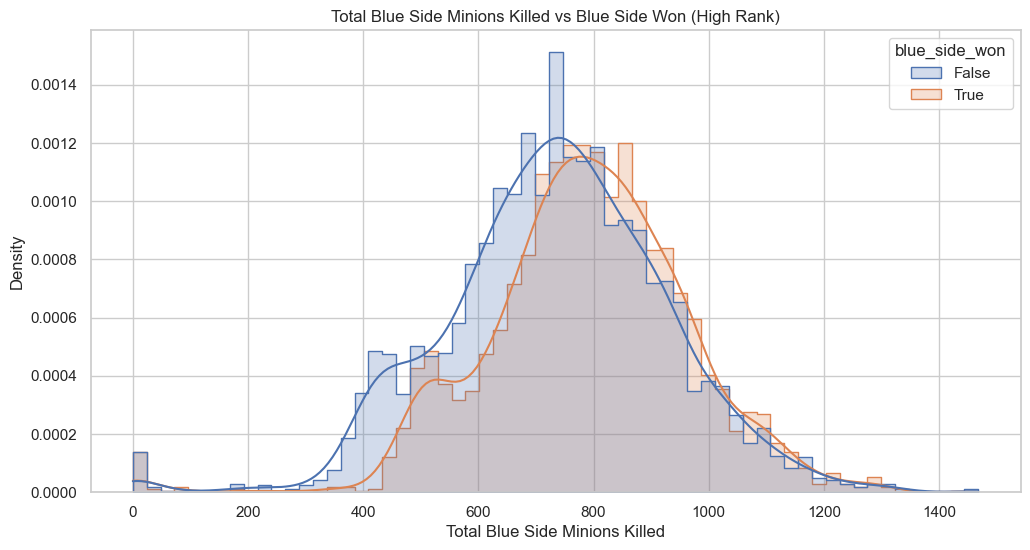

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(data=low_rank, x='total_blue_side_gold_earned', hue='blue_side_won', kde=True, element="step", stat="density")
plt.title('Total Blue Side Gold Earned vs Blue Side Won (Low Rank)')
plt.xlabel('Total Blue Side Gold Earned')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=high_rank, x='total_blue_side_gold_earned', hue='blue_side_won', kde=True, element="step", stat="density")
plt.title('Total Blue Side Gold Earned vs Blue Side Won (High Rank)')
plt.xlabel('Total Blue Side Gold Earned')
plt.ylabel('Density')
plt.show()

# Histogram for total blue side minions killed vs blue side won
plt.figure(figsize=(12, 6))
sns.histplot(data=high_rank, x='total_blue_side_minions_killed', hue='blue_side_won', kde=True, element="step", stat="density")
plt.title('Total Blue Side Minions Killed vs Blue Side Won (High Rank)')
plt.xlabel('Total Blue Side Minions Killed')
plt.ylabel('Density')
plt.show()

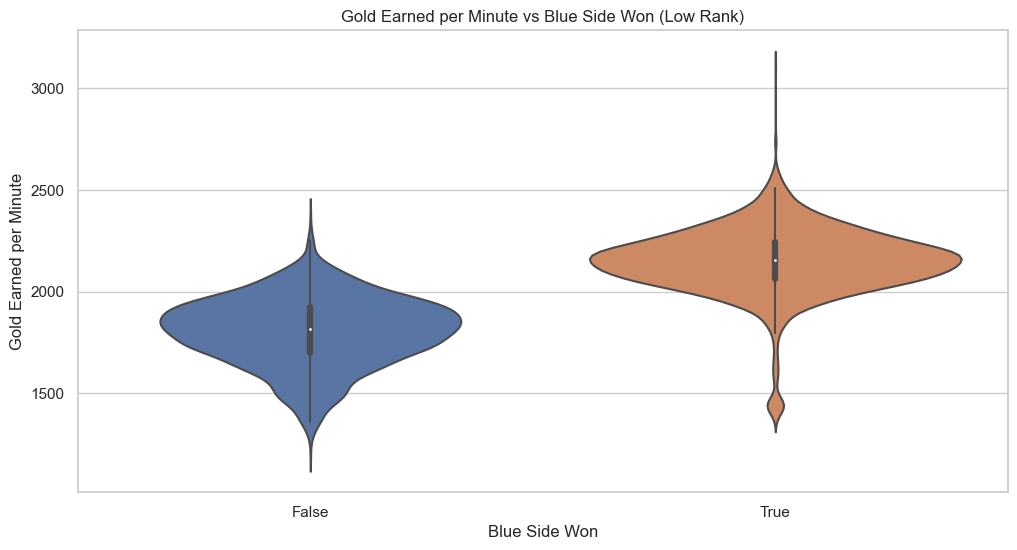

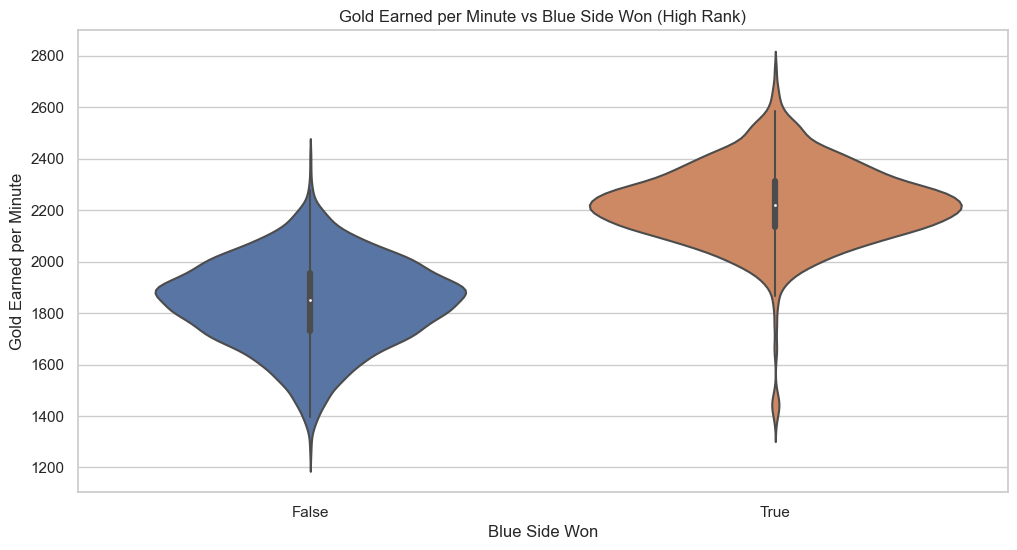

In [24]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='blue_side_won', y='blue_side_gpm', data=low_rank)
plt.title('Gold Earned per Minute vs Blue Side Won (Low Rank)')
plt.xlabel('Blue Side Won')
plt.ylabel('Gold Earned per Minute')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='blue_side_won', y='blue_side_gpm', data=high_rank)
plt.title('Gold Earned per Minute vs Blue Side Won (High Rank)')
plt.xlabel('Blue Side Won')
plt.ylabel('Gold Earned per Minute')
plt.show()

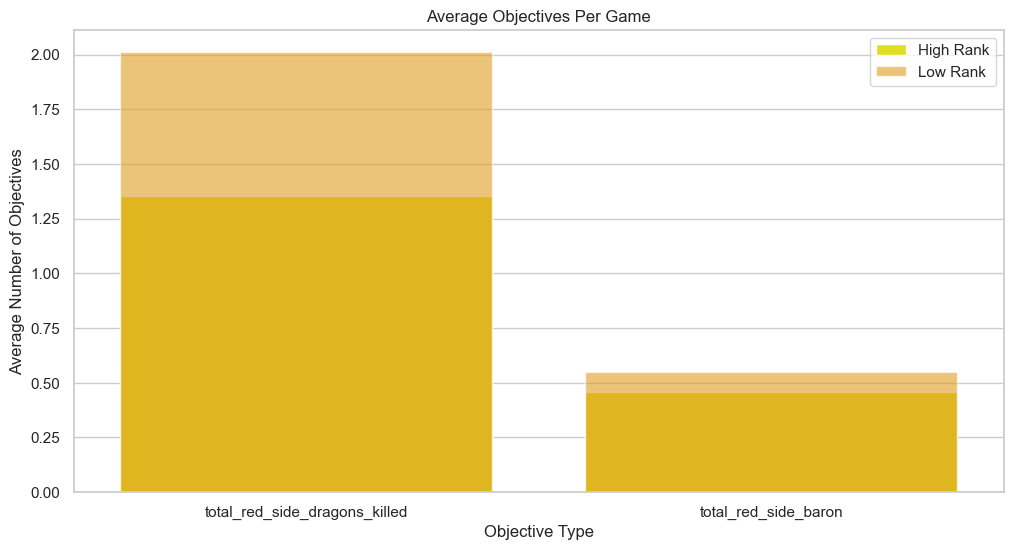

In [30]:
# Average objectives per game by high and low rank players
avg_objectives_high = high_rank[['total_blue_side_dragons_killed', 'total_blue_side_baron']].mean()
avg_objectives_low = low_rank[['total_red_side_dragons_killed', 'total_red_side_baron']].mean()

# Creating the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_objectives_high.index, y=avg_objectives_high.values, color='yellow', label='High Rank')
sns.barplot(x=avg_objectives_low.index, y=avg_objectives_low.values, color='orange', alpha=0.6, label='Low Rank')
plt.title('Average Objectives Per Game')
plt.ylabel('Average Number of Objectives')
plt.xlabel('Objective Type')
plt.legend()
plt.show()
